In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 

In [69]:
#Read dataset
data = pd.read_excel(r"D:\Abdulrahman\Advanced Data Anaysis\Projects\EDA\Online Retail.xlsx") 

In [4]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Display Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
data.shape

(541909, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Check for Missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Delete Missing values
data = data.dropna(subset=['CustomerID', 'Description'])

In [ ]:
# Check for Missing values
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Check for Duplicate values
data.duplicated().sum()

5225

In [ ]:
# Delete Duplicate values
data = data.drop_duplicates()

In [ ]:
# Check for Duplicate values
data.duplicated().sum()

0

In [15]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Filter rows where StockCode is 'D' indicating a discount 
data[data['StockCode'] == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [ ]:
# Count how many product descriptions contain the word 'discount'
(data['Description'].str.contains('discount', case = False)).sum()

77

In [ ]:
# Make data backup
data_backup = data.copy()

In [ ]:
# Remove rows with StockCode 'D' or descriptions containing the word 'discount'
data = data.loc[~((data['StockCode'] == 'D') | data['Description'].str.contains('discount', case=False, na=False))]

In [ ]:
# Check again for Count how many product descriptions contain the word 'discount'and 'D'
print((data['StockCode'] == 'D').sum())  
print(data['Description'].str.contains('discount', case=False, na=False).sum())

0
0


In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Count how many transactions have zero or negative quantity
(data['Quantity'] <= 0).sum()

8795

In [ ]:
# Count how many transactions have zero or negative UnitPrice
(data['UnitPrice'] <=0).sum()

40

In [ ]:
# Remove rows with zero or negative quantity
data = data[~(data['Quantity'] <= 0)]

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Check again Count how many transactions have zero or negative Quantity
(data['Quantity'] <= 0).sum()

0

In [ ]:
# Remove rows with zero or negative UnitPrice
data = data[~(data['UnitPrice'] <= 0)]

In [ ]:
# Check again Count how many transactions have zero or negative UnitPrice
(data['UnitPrice'] <= 0).sum()

0

In [29]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Make data backup for new information
data_backup = data.copy()

In [ ]:
# Convert InvoiceNo column to string type
data['InvoiceNo']= data['InvoiceNo'].astype(str)

In [ ]:
# Check InvoiceNo column type
type('InvoiceNo')

str

In [ ]:
# Remove cancelled transactions InvoiceNo starting with 'C'
data = data.loc[~data['InvoiceNo'].str.startswith('C')]

In [ ]:
# Make data backup for new information
data_backup = data.copy()

In [35]:
data.head(392692)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Get the total number of distinct product codes 'StockCode' to understand product variety
data['StockCode'].nunique()

3665

In [ ]:
# Display the top 20 most frequent stock codes
data['StockCode'].value_counts().head(20) 

StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
22383     1063
22197     1060
21212     1050
23298     1021
23209     1020
22086     1003
22382      993
22469      979
20728      977
22457      972
Name: count, dtype: int64

In [ ]:
# Remove rows with unwanted stock codes (e.g., charges, samples, promotional items)

codes_to_remove = [
    'BANK CHARGES', 'POST', 'DOT', 'M', 'S', 'PADS', 'CRUK', 'C2',
    'DCGSSBOY', 'DOGSSGIRL', 'gift_0001_10', 'gift_0001_20',
    'gift_0001_30', 'gift_0001_40', 'gift_0001_50',
    'DCGS0070', 'DCGS0071', 'DCGS0072', 'DCGS0073', 'DCGS0074',
    'DCGS0076', 'DCGSSBOY', 'DCGSSGIRL', 'DCGS0003', 'DCGS0004',
    'DCGS0055', 'DCGS0057', 'DCGS0066P', 'DCGS0067', 'DCGS0068', 'DCGS0069'
]

data = data.loc[~data['StockCode'].isin(codes_to_remove)]

In [39]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Make data backup for new information
data_backup = data.copy()

In [ ]:
# Calculate revenue for each row as Quantity multiplied by UnitPrice
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [42]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Count how many rows have zero or negative revenue
(data['Revenue'] <=0).sum()

0

In [ ]:
# Make data backup again for new information
data_backup = data.copy()

In [45]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Convert InvoiceDate column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
# Extract year, month name, day name, and time from InvoiceDate into new columns
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month_name()
data['Week'] = data['InvoiceDate'].dt.day_name()
data['Time']= data['InvoiceDate'].dt.time

In [48]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Week,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00


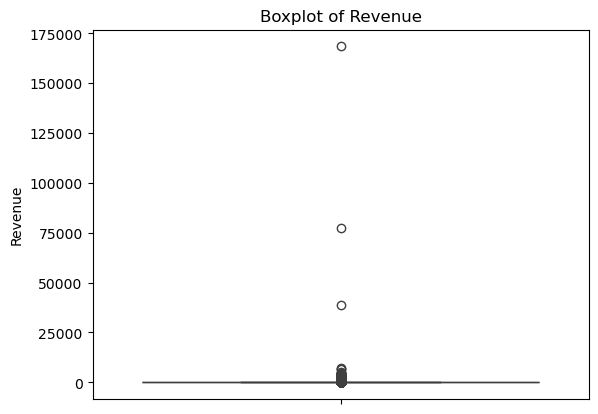

In [ ]:
# Plot boxplot of Revenue to identify outliers
sns.boxplot(data['Revenue'])
plt.title('Boxplot of Revenue')
plt.ylabel('Revenue')
plt.show()

This boxplot displays the distribution of revenue values in the dataset. The circles above the box represent **outliers** — unusually high revenue values that fall far outside the normal range. Identifying these outliers helps in understanding anomalies or errors in transactions and deciding whether to include or remove them during analysis.

In [50]:
# Calculate 25th percentile 
percentile25 = data['Revenue'].quantile(0.25)
# Calculate 75th percentile
percentile75 = data['Revenue'].quantile(0.75)
# Calculate interquartile range
iqr = percentile75 - percentile25
# Calculate upper and lower  for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


print('Lower limit is: ', lower_limit)
print('Upper limit is: ',upper_limit)


Lower limit is:  -17.325
Upper limit is:  42.074999999999996


In [ ]:
# Count how many Revenue values are outside the specified lower and upper limits (outliers)
((data['Revenue'] < lower_limit) | (data['Revenue'] > upper_limit)).sum()

30484

In [ ]:
# Filter data to keep only rows with Revenue within the limits and save to CSV file
outlier_data = data[(data['Revenue'] >= lower_limit) & (data['Revenue'] <= upper_limit)]
outlier_data.to_csv('D:/Abdulrahman/Advanced Data Anaysis/Projects/EDA/outliers_revenue.csv', index=False)


In [53]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Week,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00


In [ ]:
# Make data backup again for new information
data_backup = data.copy()

In [55]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Week,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00


In [ ]:
# Group data by Country and calculate total revenue per country, sorted descending
country_revenue_sum =data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_revenue_sum

Country
United Kingdom          7242855.32
Netherlands              283889.34
EIRE                     257013.12
Germany                  205381.15
France                   183801.94
Australia                138103.81
Spain                     55706.56
Switzerland               52441.95
Japan                     37416.37
Belgium                   36927.34
Sweden                    36828.83
Norway                    32454.64
Portugal                  26643.90
Channel Islands           19997.54
Finland                   18344.88
Denmark                   18211.34
Italy                     15820.24
Cyprus                    13167.16
Singapore                  9120.39
Austria                    8742.68
Israel                     7215.84
Poland                     6974.65
Greece                     4425.52
Iceland                    4310.00
USA                        3580.39
Canada                     3115.44
Unspecified                2660.77
Malta                      2070.59
United Arab 

In [ ]:
# Group data by CustomerID and calculate total revenue per customer, sorted descending
customerid_revenue_sum = data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)
customerid_revenue_sum

CustomerID
14646.0    279138.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    136161.83
             ...    
16878.0        13.30
17956.0        12.75
14792.0         6.20
16454.0         5.90
16738.0         3.75
Name: Revenue, Length: 4334, dtype: float64

In [ ]:
# Group data by Month and calculate total revenue per month, sorted descending
month_revenue_sum = data.groupby('Month')['Revenue'].sum().sort_values(ascending=False)
month_revenue_sum

Month
November     1136534.00
December     1077427.64
October      1002326.56
September     938752.63
May           659242.49
June          653264.92
August        635514.38
July          591603.79
March         583143.85
January       562682.91
April         454440.88
February      442293.59
Name: Revenue, dtype: float64

In [ ]:
# Group data by day of the week and calculate total revenue per weekday, sorted descending
weekday_revenue_sum = data.groupby('Week')['Revenue'].sum().sort_values(ascending=False)
weekday_revenue_sum

Week
Thursday     1939228.91
Tuesday      1672493.12
Wednesday    1559469.25
Friday       1459797.08
Monday       1326500.48
Sunday        779738.80
Name: Revenue, dtype: float64

In [60]:
# Calculate number of unique orders per country
orders_per_country = data.groupby('Country')['InvoiceNo'].nunique()

# Calculate number of unique customers per country
customers_per_country = data.groupby('Country')['CustomerID'].nunique()

# Calculate average orders per customer for each country
avg_orders_per_customer_country = orders_per_country / customers_per_country

print("Average orders per customer in each country:")
print(avg_orders_per_customer_country)


# Calculate number of unique orders per customer
orders_per_customer = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate overall average number of orders per customer
avg_orders_per_customer = orders_per_customer.mean()

print("\nOverall average number of orders per customer:")
print(avg_orders_per_customer)


Average orders per customer in each country:
Country
Australia                6.222222
Austria                  1.545455
Bahrain                  1.000000
Belgium                  3.920000
Brazil                   1.000000
Canada                   1.250000
Channel Islands          2.777778
Cyprus                   1.750000
Czech Republic           2.000000
Denmark                  2.000000
EIRE                    85.333333
European Community       3.000000
Finland                  3.333333
France                   4.356322
Germany                  4.712766
Greece                   1.250000
Iceland                  7.000000
Israel                   1.666667
Italy                    2.500000
Japan                    2.375000
Lebanon                  1.000000
Lithuania                4.000000
Malta                    2.500000
Netherlands             10.333333
Norway                   3.200000
Poland                   3.166667
Portugal                 2.578947
RSA                      1.00

In [ ]:
# Create a YearMonth column combining year and month, then calculate total revenue per month
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M').astype(str)
year_month_revenue = data.groupby('YearMonth')['Revenue'].sum()
year_month_revenue

YearMonth
2010-12     565199.56
2011-01     562682.91
2011-02     442293.59
2011-03     583143.85
2011-04     454440.88
2011-05     659242.49
2011-06     653264.92
2011-07     591603.79
2011-08     635514.38
2011-09     938752.63
2011-10    1002326.56
2011-11    1136534.00
2011-12     512228.08
Name: Revenue, dtype: float64

In [ ]:
# Group data by product description and calculate total revenue per product, sorted descending
product_revenue = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
product_revenue

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
                                        ...    
PINK CRYSTAL GUITAR PHONE CHARM            0.85
PURPLE FRANGIPANI HAIRCLIP                 0.85
VINTAGE BLUE TINSEL REEL                   0.84
SET 12 COLOURING PENCILS DOILEY            0.65
HEN HOUSE W CHICK IN NEST                  0.42
Name: Revenue, Length: 3871, dtype: float64

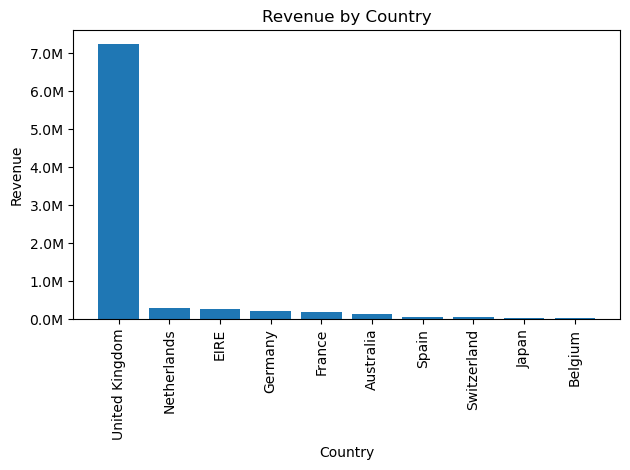

In [ ]:
# Plot bar chart of top 10 countries by revenue with formatted y-axis in millions
top_10 = country_revenue_sum.head(10)
plt.bar(top_10.index,top_10.values )
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.xticks(rotation=90)  
plt.tight_layout()       
plt.show()

**Revenue by Country**  
Top revenue generator: **United Kingdom**  
Followed by:  
Netherlands, EIRE (Ireland), Germany, France, Australia, Spain, Switzerland, Japan, Belgium

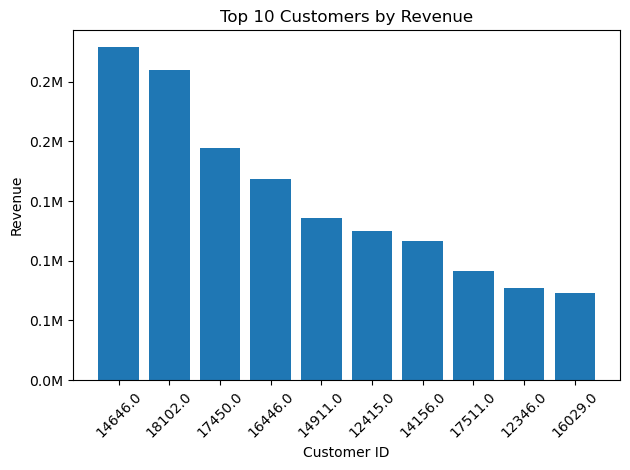

In [ ]:
# Plot bar chart of top 10 customers by revenue with y-axis formatted in millions
top_10_customers = customerid_revenue_sum.head(10)

plt.bar(top_10_customers.index.astype(str), top_10_customers.values)
plt.title('Top 10 Customers by Revenue')

plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows the top VIP customers who generate the most revenue. these customers represent the most valuable revenue sources for the compaany.

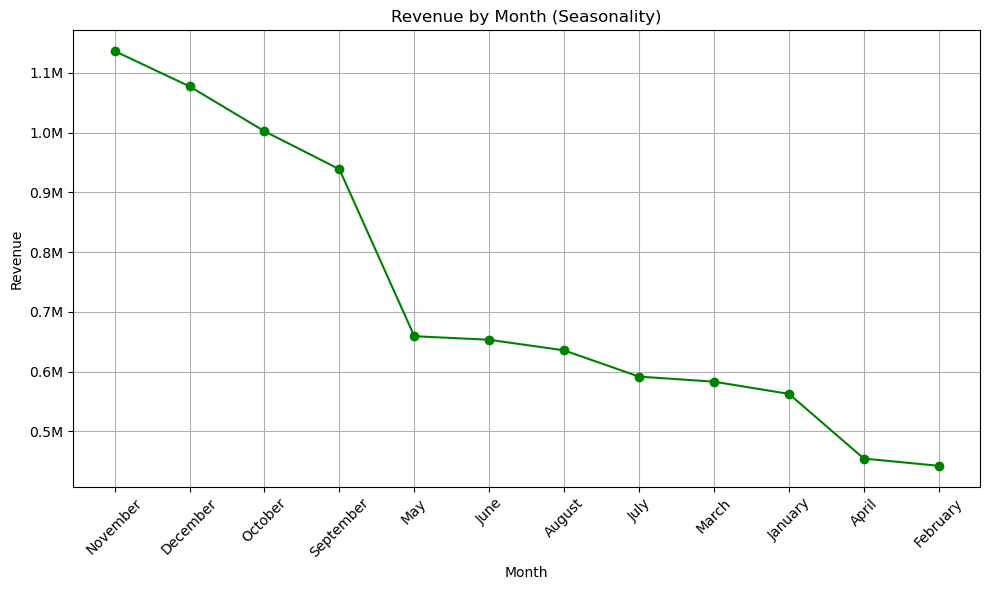

In [ ]:
# Plot line chart of monthly revenue showing seasonality with formatted y-axis in millions
plt.figure(figsize=(10,6))
plt.plot(month_revenue_sum.index, month_revenue_sum.values, marker='o', color='green')
plt.title('Revenue by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

Line chart showing monthly revenue trends. Revenue peaks in November, followed by December and October, indicating strong seasonal sales at the end of the year. Revenue is lowest in February and April.


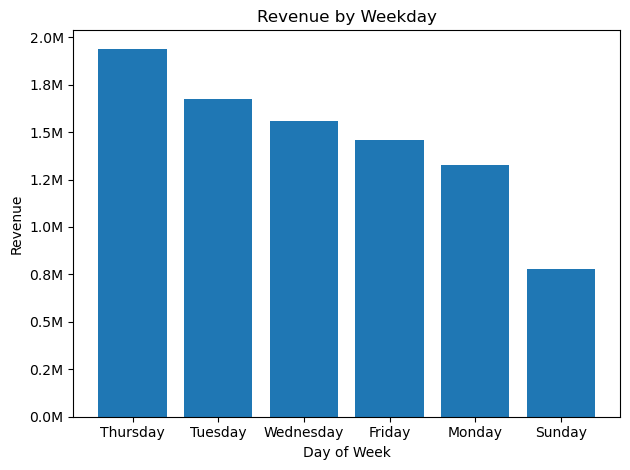

In [ ]:
# Plot bar chart of total revenue by weekday with y-axis formatted in millions
plt.bar(weekday_revenue_sum.index, weekday_revenue_sum.values)
plt.title('Revenue by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.tight_layout()
plt.show()

Bar chart showing revenue by weekday. Thursday generated the highest revenue, followed by Tuesday and Wednesday. Revenue is lowest on Sunday.

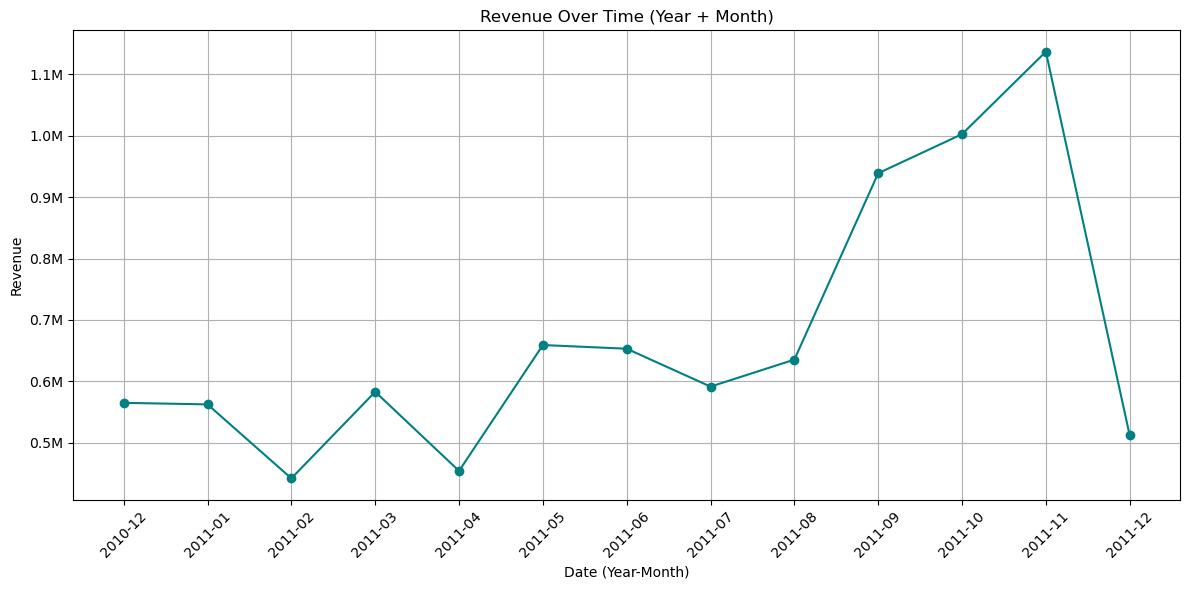

In [ ]:
# Plot line chart showing revenue trend over time by year and month with y-axis formatted in millions
plt.figure(figsize=(12,6))
plt.plot(year_month_revenue.index, year_month_revenue.values, marker='o', color='teal')
plt.title('Revenue Over Time (Year + Month)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.tight_layout()
plt.show()

Line chart showing total revenue over time by Year and Month. The chart highlights seasonal trends across both years, with revenue peaking in October and November 2011, and lower revenue observed in February and April 2011.

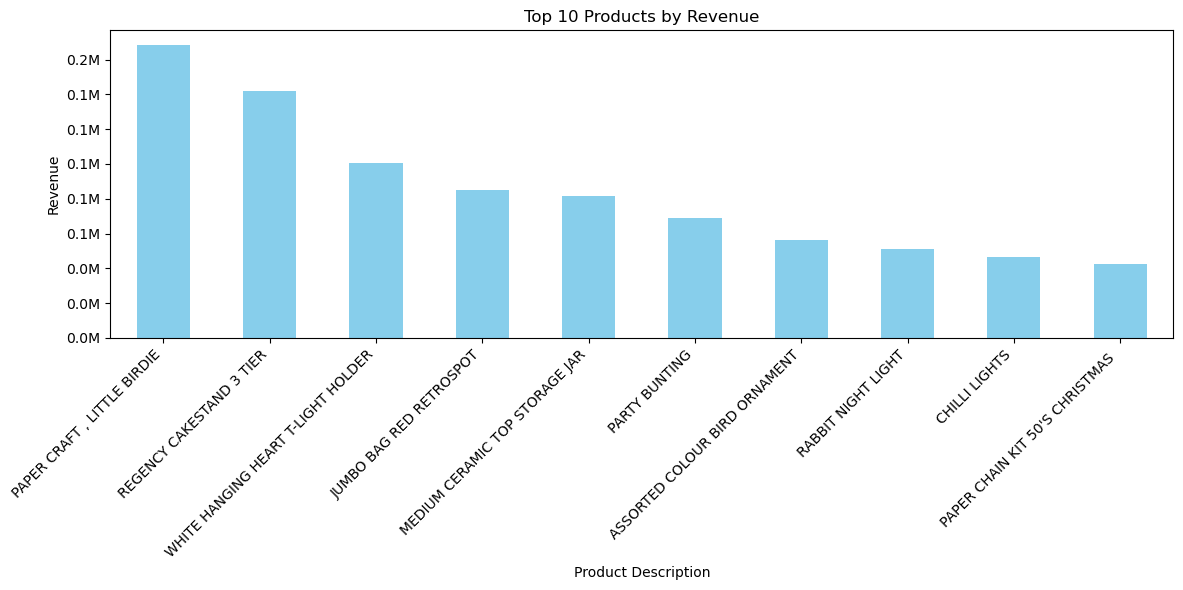

In [ ]:
# Plot bar chart of top 10 products by revenue with formatted y-axis in millions
plt.figure(figsize=(12,6))
product_revenue.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.tight_layout()
plt.show()

The bar chart above displays the top 10 products generating the highest revenue. These products contribute significantly to the company's overall sales. Focusing marketing efforts and inventory management on these items can help maximize revenue and meet customer demand effectively.
